In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# define the intersections of two lines

def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [3]:
tolerance = 0.01

# discretization of triangle
lambda1 = np.array([1./3., 1./3.])
lambda5 = np.array([0.5 - 0.5*tolerance, 0.5 - 0.5*tolerance])
lambda15 = [1.0 - 2*tolerance, tolerance]

lambda2 = lambda1 + 0.25 * (lambda5 - lambda1)
lambda3 = lambda1 + 0.50 * (lambda5 - lambda1)
lambda4 = lambda1 + 0.75 * (lambda5 - lambda1)
lambda6 = lambda1 + 0.25 * (lambda15 - lambda1)
lambda9 = lambda5 + 0.25 * (lambda15 - lambda5)
lambda10 = lambda1 + 0.50 * (lambda15 - lambda1)
lambda12 = lambda5 + 0.50 * (lambda15 - lambda5)
lambda13 = lambda1 + 0.75 * (lambda15 - lambda1)
lambda14 = lambda5 + 0.75 * (lambda15 - lambda5)

lambda7 = np.array(line_intersection((lambda2,lambda14),(lambda3,lambda10)))
lambda8 = np.array(line_intersection((lambda4,lambda13),(lambda3,lambda12)))
lambda11 = np.array(line_intersection((lambda2,lambda14),(lambda4,lambda13)))

tri_domain = (lambda5, lambda1, lambda15)

In [4]:
def find_key(input_dict, value):
    return {k for k, v in input_dict.items() if np.array_equal(v,value)}

In [5]:
# create a dictionary for nodes

nodes = {'lambda1':lambda1,
        'lambda2':lambda2,
        'lambda3':lambda3,
        'lambda4':lambda4,
        'lambda5':lambda5,
        'lambda6':lambda6,
        'lambda7':lambda7,
        'lambda8':lambda8,
        'lambda9':lambda9,
        'lambda10':lambda10,
        'lambda11':lambda11,
        'lambda12':lambda12,
        'lambda13':lambda13,
        'lambda14':lambda14,
        'lambda15':lambda15}

key, coor = zip(*nodes.items())

In [6]:
def point_in_triangle(point, triangle):
    """Returns True if the point is inside the triangle
    and returns False if it falls outside.
    - The argument *point* is a tuple with two elements
    containing the X,Y coordinates respectively.
    - The argument *triangle* is a tuple with three elements each
    element consisting of a tuple of X,Y coordinates.

    It works like this:
    Walk clockwise or counterclockwise around the triangle
    and project the point onto the segment we are crossing
    by using the dot product.
    Finally, check that the vector created is on the same side
    for each of the triangle's segments.
    """
    # Unpack arguments
    x, y = point
    ax, ay = triangle[0]
    bx, by = triangle[1]
    cx, cy = triangle[2]
    # Segment A to B
    side_1 = (x - bx) * (ay - by) - (ax - bx) * (y - by)
    # Segment B to C
    side_2 = (x - cx) * (by - cy) - (bx - cx) * (y - cy)
    # Segment C to A
    side_3 = (x - ax) * (cy - ay) - (cx - ax) * (y - ay)
    # All the signs must be positive or all negative
    return (side_1 < 0.0) == (side_2 < 0.0) == (side_3 < 0.0)

def find_key(input_dict, value):
    return {k for k, v in input_dict.items() if np.array_equal(v,value)}

In [7]:
# verify the orthogonality of matrix R

def check_orthogonal(M):
    # make sure the input is a matrix
    if len(np.shape(M)) != 2:
        print("error: input is not a matrix")
        return False
    # make sure the input is a square matrix
    dim = np.shape(M)[0]
    if dim != np.shape(M)[1]:
        print("error: input is not a square matrix")
        return False
    A = np.dot(M, M.T)
    if np.allclose(A, np.identity(dim)):
        #print("matrix is orthogonal")
        return True
    else:
        #print("matrix is not orthogonal")
        return False

In [8]:
# generate matrix A and its eigenvalues as coordinate of the random point

matirces_A = []
matrices_R = []
transpose_R = []

for i in range(0,100):
    
    # generate random matrix A
    A_random = np.random.rand(3,3)
    A_symmetric = 0.5 * (A_random + np.transpose(A_random))
    w,R = np.linalg.eig(A_symmetric)
    Rt  = np.transpose(R)
    w   = w.clip(min=0.01)
    w  /= np.linalg.norm(w, 1)
    wDiagonal = np.diag(w)

    A_positiveDefinite = np.real(np.dot(np.dot(R, wDiagonal), Rt))
    
    # compute eigenvalues and eigenvectors of A
    evalue, evect = np.linalg.eig(A_positiveDefinite)
    evalue1 = np.sort(evalue)[::-1]
    EV_coor = [evalue1[0], evalue1[1]]
    
    # check the random point located within triangle && all of entries in matrix A is positive  
    if check_orthogonal(R):
        if point_in_triangle(EV_coor, tri_domain):
            matirces_A.append(A_positiveDefinite)
            matrices_R.append(R)
            transpose_R.append(Rt)
        
# use first matrix from list matirces_A for plotting and computation
evalue2, evect2 = np.linalg.eig(matirces_A[0])
evalue3 = np.sort(evalue2)[::-1]
random_point_new = [evalue3[0], evalue3[1]]

print('The fiber orientation tensor A is:')
print(matirces_A[0])
print('The eigenvalue of matrix A is: ',evalue2)
print('')

The fiber orientation tensor A is:
[[0.38470668 0.35770736 0.30506692]
 [0.35770736 0.35439106 0.29241351]
 [0.30506692 0.29241351 0.26090225]]
The eigenvalue of matrix A is:  [0.0115205  0.97695899 0.0115205 ]



In [9]:
# create and add triangles into a list
triangles=[]

triangles.append((lambda2,lambda1,lambda6))
triangles.append((lambda2,lambda6,lambda7))
triangles.append((lambda3,lambda2,lambda7))
triangles.append((lambda3,lambda7,lambda8))
triangles.append((lambda4,lambda3,lambda8))
triangles.append((lambda4,lambda8,lambda9))
triangles.append((lambda5,lambda4,lambda9))
triangles.append((lambda7,lambda6,lambda10))
triangles.append((lambda7,lambda10,lambda11))
triangles.append((lambda8,lambda7,lambda11))
triangles.append((lambda8,lambda11,lambda12))
triangles.append((lambda9,lambda8,lambda12))
triangles.append((lambda11,lambda10,lambda13))
triangles.append((lambda11,lambda13,lambda14))
triangles.append((lambda12,lambda11,lambda14))
triangles.append((lambda14,lambda13,lambda15))

In [10]:
print('We found the random node in following triangle: ')

triangle_nodes = []

for coordinate in coor:
    for triangle in triangles:
        if point_in_triangle(random_point_new, triangle):
            for j in range(3):
                if np.array_equal(coordinate, triangle[j]):
                    print(find_key(nodes, triangle[j]))
                    print(triangle[j])
                    triangle_nodes.append(triangle[j])
                    
print(triangle_nodes)

We found the random node in following triangle: 
{'lambda13'}
[0.81833333 0.09083333]
{'lambda14'}
[0.85875 0.13125]
{'lambda15'}
[0.98, 0.01]
[array([0.81833333, 0.09083333]), array([0.85875, 0.13125]), [0.98, 0.01]]


In [11]:
print('lambda 1 is: ',lambda1)

print('lambda 2 is: ',lambda2)

print('lambda 3 is: ',lambda3)

print('lambda 4 is: ',lambda4)

print('lambda 5 is: ',lambda5)

print('lambda 6 is: ',lambda6)

print('lambda 7 is: ',lambda7)

print('lambda 8 is: ',lambda8)

print('lambda 9 is: ',lambda9)

print('lambda 10 is: ',lambda10)

print('lambda 11 is: ',lambda11)

print('lambda 12 is: ',lambda12)

print('lambda 13 is: ',lambda13)

print('lambda 14 is: ',lambda14)

print('lambda 15 is: ',lambda15)

print('random point is: ',random_point_new)

lambda 1 is:  [0.33333333 0.33333333]
lambda 2 is:  [0.37375 0.37375]
lambda 3 is:  [0.41416667 0.41416667]
lambda 4 is:  [0.45458333 0.45458333]
lambda 5 is:  [0.495 0.495]
lambda 6 is:  [0.495  0.2525]
lambda 7 is:  [0.53541667 0.29291667]
lambda 8 is:  [0.57583333 0.33333333]
lambda 9 is:  [0.61625 0.37375]
lambda 10 is:  [0.65666667 0.17166667]
lambda 11 is:  [0.69708333 0.21208333]
lambda 12 is:  [0.7375 0.2525]
lambda 13 is:  [0.81833333 0.09083333]
lambda 14 is:  [0.85875 0.13125]
lambda 15 is:  [0.98, 0.01]
random point is:  [0.9769589944923074, 0.011520502753846418]


In [131]:
def ShapeFunction(x, y, x1, y1, x2, y2, x3, y3):
    
    # define parameters and shape functions 
    A_e = 0.5*(np.linalg.det(np.array([[1,x1,y1], [1,x2,y2],[1,x3,y3]])))
    
    xi = (1/(2*A_e))*((y3-y1)*(x-x1)-(x3-x1)*(y-y1))
    eta = (1/(2*A_e))*((x2-x1)*(y-y1)-(y2-y1)*(x-x1))
    
    N1 = 1-xi-eta
    N2 = xi
    N3 = eta
    
    s1 = N1
    s2 = N2
    s3 = N3
    
    x_new = x1*s1+x2*s2+x3*s3
    y_new = y1*s1+y2*s2+y3*s3
    
    print('s1=',s1)
    print('s2=',s2)
    print('s3=',s3)
    
    return x_new, y_new

In [132]:
new_random_point = np.asarray(ShapeFunction(random_point_new[0], random_point_new[1], triangle_nodes[0][0], triangle_nodes[0][1], triangle_nodes[1][0], triangle_nodes[1][1], triangle_nodes[2][0], triangle_nodes[2][1]))
print(new_random_point)

s1= 0.46578733268530476
s2= 0.4918894941284076
s3= 0.04232317318628772
[0.72380611 0.22854274]


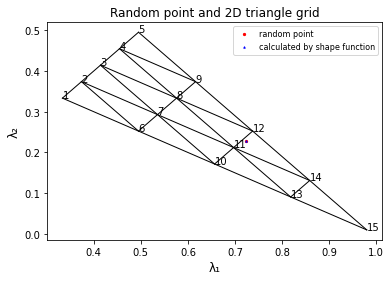

In [133]:
plt.annotate('1',(lambda1[0],lambda1[1]))
plt.annotate('2',(lambda2[0],lambda2[1]))
plt.annotate('3',(lambda3[0],lambda3[1]))
plt.annotate('4',(lambda4[0],lambda4[1]))
plt.annotate('5',(lambda5[0],lambda5[1]))
plt.annotate('6',(lambda6[0],lambda6[1]))
plt.annotate('9',(lambda9[0],lambda9[1]))
plt.annotate('10',(lambda10[0],lambda10[1]))
plt.annotate('12',(lambda12[0],lambda12[1]))
plt.annotate('13',(lambda13[0],lambda13[1]))
plt.annotate('14',(lambda14[0],lambda14[1]))
plt.annotate('15',(lambda15[0],lambda15[1]))
plt.annotate('7',lambda7)
plt.annotate('8',lambda8)
plt.annotate('11',lambda11)

plt.plot([lambda1[0], lambda15[0]], [lambda1[1], lambda15[1]], color = 'k', linewidth = 1, linestyle = 'solid')
plt.plot([lambda2[0], lambda14[0]], [lambda2[1], lambda14[1]], color = 'k', linewidth = 1, linestyle = 'solid')
plt.plot([lambda3[0], lambda12[0]], [lambda3[1], lambda12[1]], color = 'k', linewidth = 1, linestyle = 'solid')
plt.plot([lambda4[0], lambda9[0]], [lambda4[1], lambda9[1]], color = 'k', linewidth = 1, linestyle = 'solid')
plt.plot([lambda1[0], lambda5[0]], [lambda1[1], lambda5[1]], color = 'k', linewidth = 1, linestyle = 'solid')
plt.plot([lambda6[0], lambda9[0]], [lambda6[1], lambda9[1]], color = 'k', linewidth = 1, linestyle = 'solid')
plt.plot([lambda10[0], lambda12[0]], [lambda10[1], lambda12[1]], color = 'k', linewidth = 1, linestyle = 'solid')
plt.plot([lambda13[0], lambda14[0]], [lambda13[1], lambda14[1]], color = 'k', linewidth = 1, linestyle = 'solid')
plt.plot([lambda2[0], lambda6[0]], [lambda2[1], lambda6[1]], color = 'k', linewidth = 1, linestyle = 'solid')
plt.plot([lambda3[0], lambda10[0]], [lambda3[1], lambda10[1]], color = 'k', linewidth = 1, linestyle = 'solid')
plt.plot([lambda4[0], lambda13[0]], [lambda4[1], lambda13[1]], color = 'k', linewidth = 1, linestyle = 'solid')
plt.plot([lambda5[0], lambda15[0]], [lambda5[1], lambda15[1]], color = 'k', linewidth = 1, linestyle = 'solid')

subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
plt.xlabel('λ1'.translate(subscript), fontsize=12)
plt.ylabel('λ2'.translate(subscript), fontsize=12)
plt.title('Random point and 2D triangle grid')

# plot the random point
plt.scatter(random_point_new[0], random_point_new[1], s=5, color='red', label='random point')

# plot the random point what calculated by shape function
plt.scatter(new_random_point[0], new_random_point[1], s=2 ,marker="^", color='blue', label='calculated by shape function')

plt.legend(loc=0, prop={'size': 8})

# show and save
fig = plt.gcf()
plt.show()
fig.savefig('OrientationTriangle_2D_matA.pdf', format='pdf')